In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

import sympy as sym

Text(0.5, 1.0, 'Reference mean path angle, $\\phi_{ref}$')

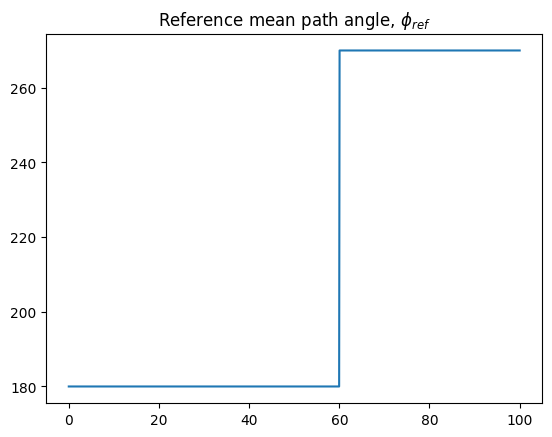

In [2]:
T = 100
dt = .1
N = int(T/dt)
timeseries = np.linspace(0, T, N)


phi_ref = np.linspace(np.pi, np.pi * 1.5, N)
phi_ref = np.where(phi_ref > 1.3 * np.pi, 1.5 * np.pi, np.pi)

plt.plot(timeseries, np.rad2deg(phi_ref))
plt.title('Reference mean path angle, $\phi_{ref}$')

In [30]:
arr_theta1 = []

def control(state, t):
    x2, x1, y2, y1, theta2, theta1, phi_1 = state
    
    F = 10
    phi_r = np.interp(t, timeseries, phi_ref)
    f_theta = (phi_r - phi_1) * 1
    
    return F, f_theta

def f(state, t):
    # print(t)
    x2, x1, y2, y1, theta2, theta1, phi_1 = state
    
    F, f_theta = control(state, t)
    
    cx = 10
    cy = 10
    ctheta = 1.2
    ck = 1
    
    x2_dot = -cx * x2 + F * np.cos(theta1 + phi_1)
    x1_dot = x2
    y2_dot = -cy * y2 + F * np.sin(theta1 + phi_1)
    y1_dot = y2
    theta2_dot = -ctheta * theta2 - ck * theta1 + f_theta
    theta1_dot = theta2
    phi_1_dot = theta1
    
    return x2_dot, x1_dot, y2_dot, y1_dot, theta2_dot, theta1_dot, phi_1_dot


initial_state = [0, 0, 0, 0, 0, 0, 0]
result = sp.integrate.odeint(f, initial_state, timeseries)
    

Text(0.5, 1.0, 'Trajectory')

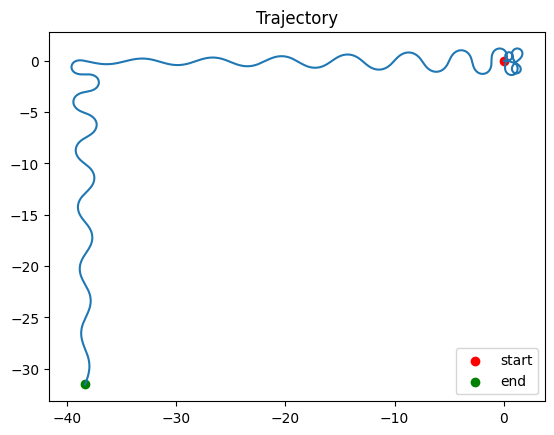

In [31]:
x = result[:, 1]
y = result[:, 3]

plt.plot(x, y)
plt.scatter(x[0], y[0], c='r', label='start')
plt.scatter(x[-1], y[-1], c='g', label='end')
plt.legend()
plt.title('Trajectory')

In [18]:
# dynamics in latex
eq1 = sym.Eq(sym.Symbol('x2'), -sym.Symbol('c_x') * sym.Symbol('x2') + sym.Symbol('F') * sym.cos(sym.Symbol('theta1') + sym.Symbol('phi_1')))
eq2 = sym.Eq(sym.Symbol('x1'), sym.Symbol('x2'))
eq3 = sym.Eq(sym.Symbol('y2'), -sym.Symbol('c_y') * sym.Symbol('y2') + sym.Symbol('F') * sym.sin(sym.Symbol('theta1') + sym.Symbol('phi_1')))
eq4 = sym.Eq(sym.Symbol('y1'), sym.Symbol('y2'))
eq5 = sym.Eq(sym.Symbol('theta2'), -sym.Symbol('c_theta') * sym.Symbol('theta2') - sym.Symbol('c_k') * sym.Symbol('theta1') + sym.Symbol('f_theta'))
eq6 = sym.Eq(sym.Symbol('theta1'), sym.Symbol('theta2'))
# eq7 = sym.Eq(sym.Symbol('phi_1'), sym.Symbol('theta1'))
eq7 = sym.Eq(sym.Symbol('phi_1'), sym.Integral(sym.Symbol('theta1'), sym.Symbol('t')))

# eq1 = sym.Eq(sym.diff(sym.Symbol('x2'), sym.Symbol('t')), -sym.Symbol('c_x') * sym.Symbol('x2') + sym.Symbol('F') * sym.cos(sym.Symbol('theta1') + sym.Symbol('phi_1')))
# eq2 = sym.Eq(sym.diff(sym.Symbol('x1'), sym.Symbol('t')), sym.Symbol('x2'))
# eq3 = sym.Eq(sym.diff(sym.Symbol('y2'), sym.Symbol('t')), -sym.Symbol('c_y') * sym.Symbol('y2') + sym.Symbol('F') * sym.sin(sym.Symbol('theta1') + sym.Symbol('phi_1')))
# eq4 = sym.Eq(sym.diff(sym.Symbol('y1'), sym.Symbol('t')), sym.Symbol('y2'))
# eq5 = sym.Eq(sym.diff(sym.Symbol('theta2'), sym.Symbol('t')), -sym.Symbol('c_theta') * sym.Symbol('theta2') - sym.Symbol('c_k') * sym.Symbol('theta1') + sym.Symbol('f_theta'))
# eq6 = sym.Eq(sym.diff(sym.Symbol('theta1'), sym.Symbol('t')), sym.Symbol('theta2'))
# eq7 = sym.Eq(sym.diff(sym.Symbol('phi_1'), sym.Symbol('t')), sym.Symbol('theta1'))

states = [sym.Symbol('x2'), sym.Symbol('x1'), sym.Symbol('y2'), sym.Symbol('y1'), sym.Symbol('theta2'), sym.Symbol('theta1'), sym.Symbol('phi_1')]
equations = [eq1, eq2, eq3, eq4, eq5, eq6, eq7]


for i,eq in enumerate(equations):
    print(f"\dot{sym.latex(states[i])}", "&=", sym.latex(eq.rhs), "\\\\")
    # display(eq)

\dotx_{2} &= F \cos{\left(\phi_{1} + \theta_{1} \right)} - c_{x} x_{2} \\
\dotx_{1} &= x_{2} \\
\doty_{2} &= F \sin{\left(\phi_{1} + \theta_{1} \right)} - c_{y} y_{2} \\
\doty_{1} &= y_{2} \\
\dot\theta_{2} &= - c_{k} \theta_{1} - c_{\theta} \theta_{2} + f_{\theta} \\
\dot\theta_{1} &= \theta_{2} \\
\dot\phi_{1} &= \int \theta_{1}\, dt \\


In [23]:
from IPython.display import Markdown

In [25]:
Markdown(f"""
\\begin{{align*}}
\\dot{{x_2}} &= -c_x x_2 + F \\cos(\\theta_1 + \\phi_1) \\\\
\\dot{{x_1}} &= x_2 \\\\
\\dot{{y_2}} &= -c_y y_2 + F \\sin(\\theta_1 + \\phi_1) \\\\
\\dot{{y_1}} &= y_2 \\\\
\\dot{{\\theta_2}} &= -c_\\theta \\theta_2 - c_k \\theta_1 + f_\\theta \\\\
\\dot{{\\theta_1}} &= \\theta_2 \\\\
\\dot{{\\phi_1}} &= \\int \\theta_1 dt
\\end{{align*}}
""")


\begin{align*}
\dot{x_2} &= -c_x x_2 + F \cos(\theta_1 + \phi_1) \\
\dot{x_1} &= x_2 \\
\dot{y_2} &= -c_y y_2 + F \sin(\theta_1 + \phi_1) \\
\dot{y_1} &= y_2 \\
\dot{\theta_2} &= -c_\theta \theta_2 - c_k \theta_1 + f_\theta \\
\dot{\theta_1} &= \theta_2 \\
\dot{\phi_1} &= \int \theta_1 dt
\end{align*}
